# BikeSharing Assignment

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

## Reading the data

In [2]:
df = pd.read_csv('./day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Analysis of variables


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Variables
* `instant`
* `dteday`
* `season`
* `yr`
* `mnth`
* `holiday`
* `weekday`
* `workingday`
* `weathersit`
* `temp`
* `atemp`
* `hum`
* `windspeed`
* `casual`
* `registered`
* `cnt`

#### Variables which can be deleted
* `instant`
    * can be deleted as it is an index
* `dteday`
    * can be deleted since we have the colums with the constituents of this
    * `yr` - gives the year
    * `mnth` - gives the month
    * `weekday` - gives the day
* `casual` - can be deleted as it is included in `cnt`
* `registered` - can be deleted as it is included in `cnt`

#### Continuous Variables
* `temp`
* `atemp`
* `hum`
* `windspeed`
#### Categorical Variables
* Binary
    * `holiday`
    * `workingday`
* Multiple
    * `season`
    * `yr`
    * `month`
    * `weekday`
    * `weathersit`

In [7]:
variables_which_can_be_deleted = ["instant", "dteday", "casual", "registered"]
df_sig = df.drop(variables_which_can_be_deleted, axis=1)

In [8]:
df_sig.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Removing outliers

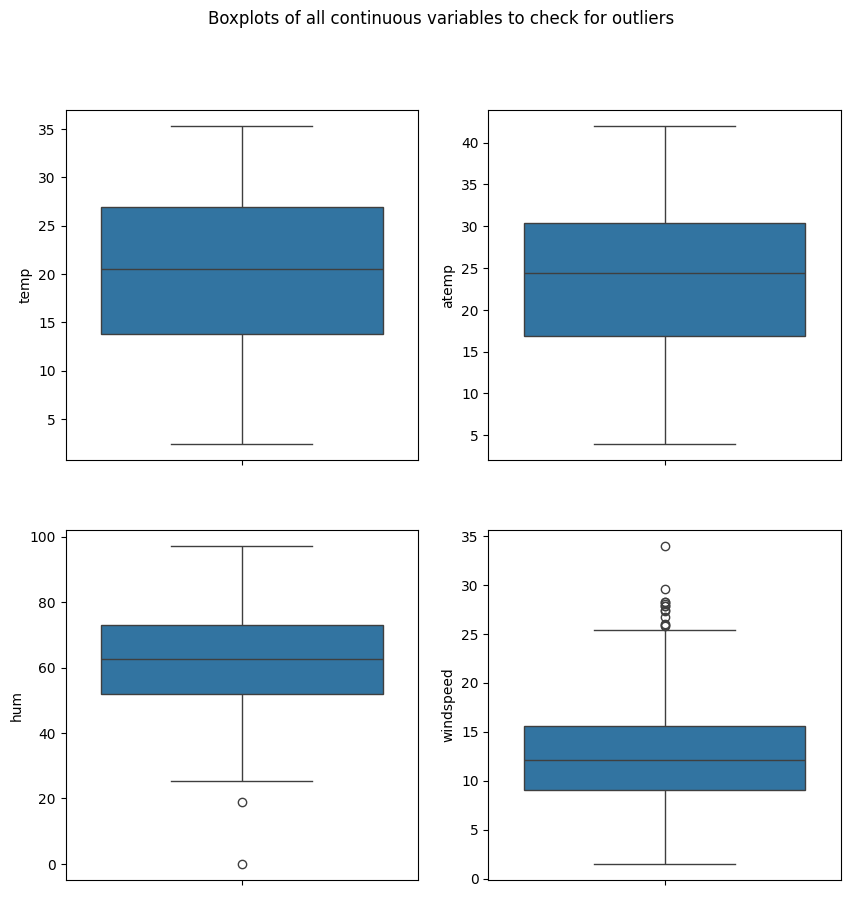

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.boxplot(df_sig.temp, ax = ax[0][0])
sns.boxplot(df_sig.atemp, ax = ax[0][1])
sns.boxplot(df_sig.hum, ax = ax[1][0])
sns.boxplot(df_sig.windspeed, ax = ax[1][1])

plt.suptitle('Boxplots of all continuous variables to check for outliers')
plt.show()

We can see that `temp` and `atemp` have no outliers but `hum` and `windspeed` both have outliers

In [10]:
df_sig = df_sig[(df_sig['hum'] > 25) & (df_sig['windspeed'] < 25)]

#### Finding relationships between variables

In [11]:
continuous_variables = ["temp", "atemp", "hum", "windspeed"]
df_continuous = df_sig[continuous_variables]

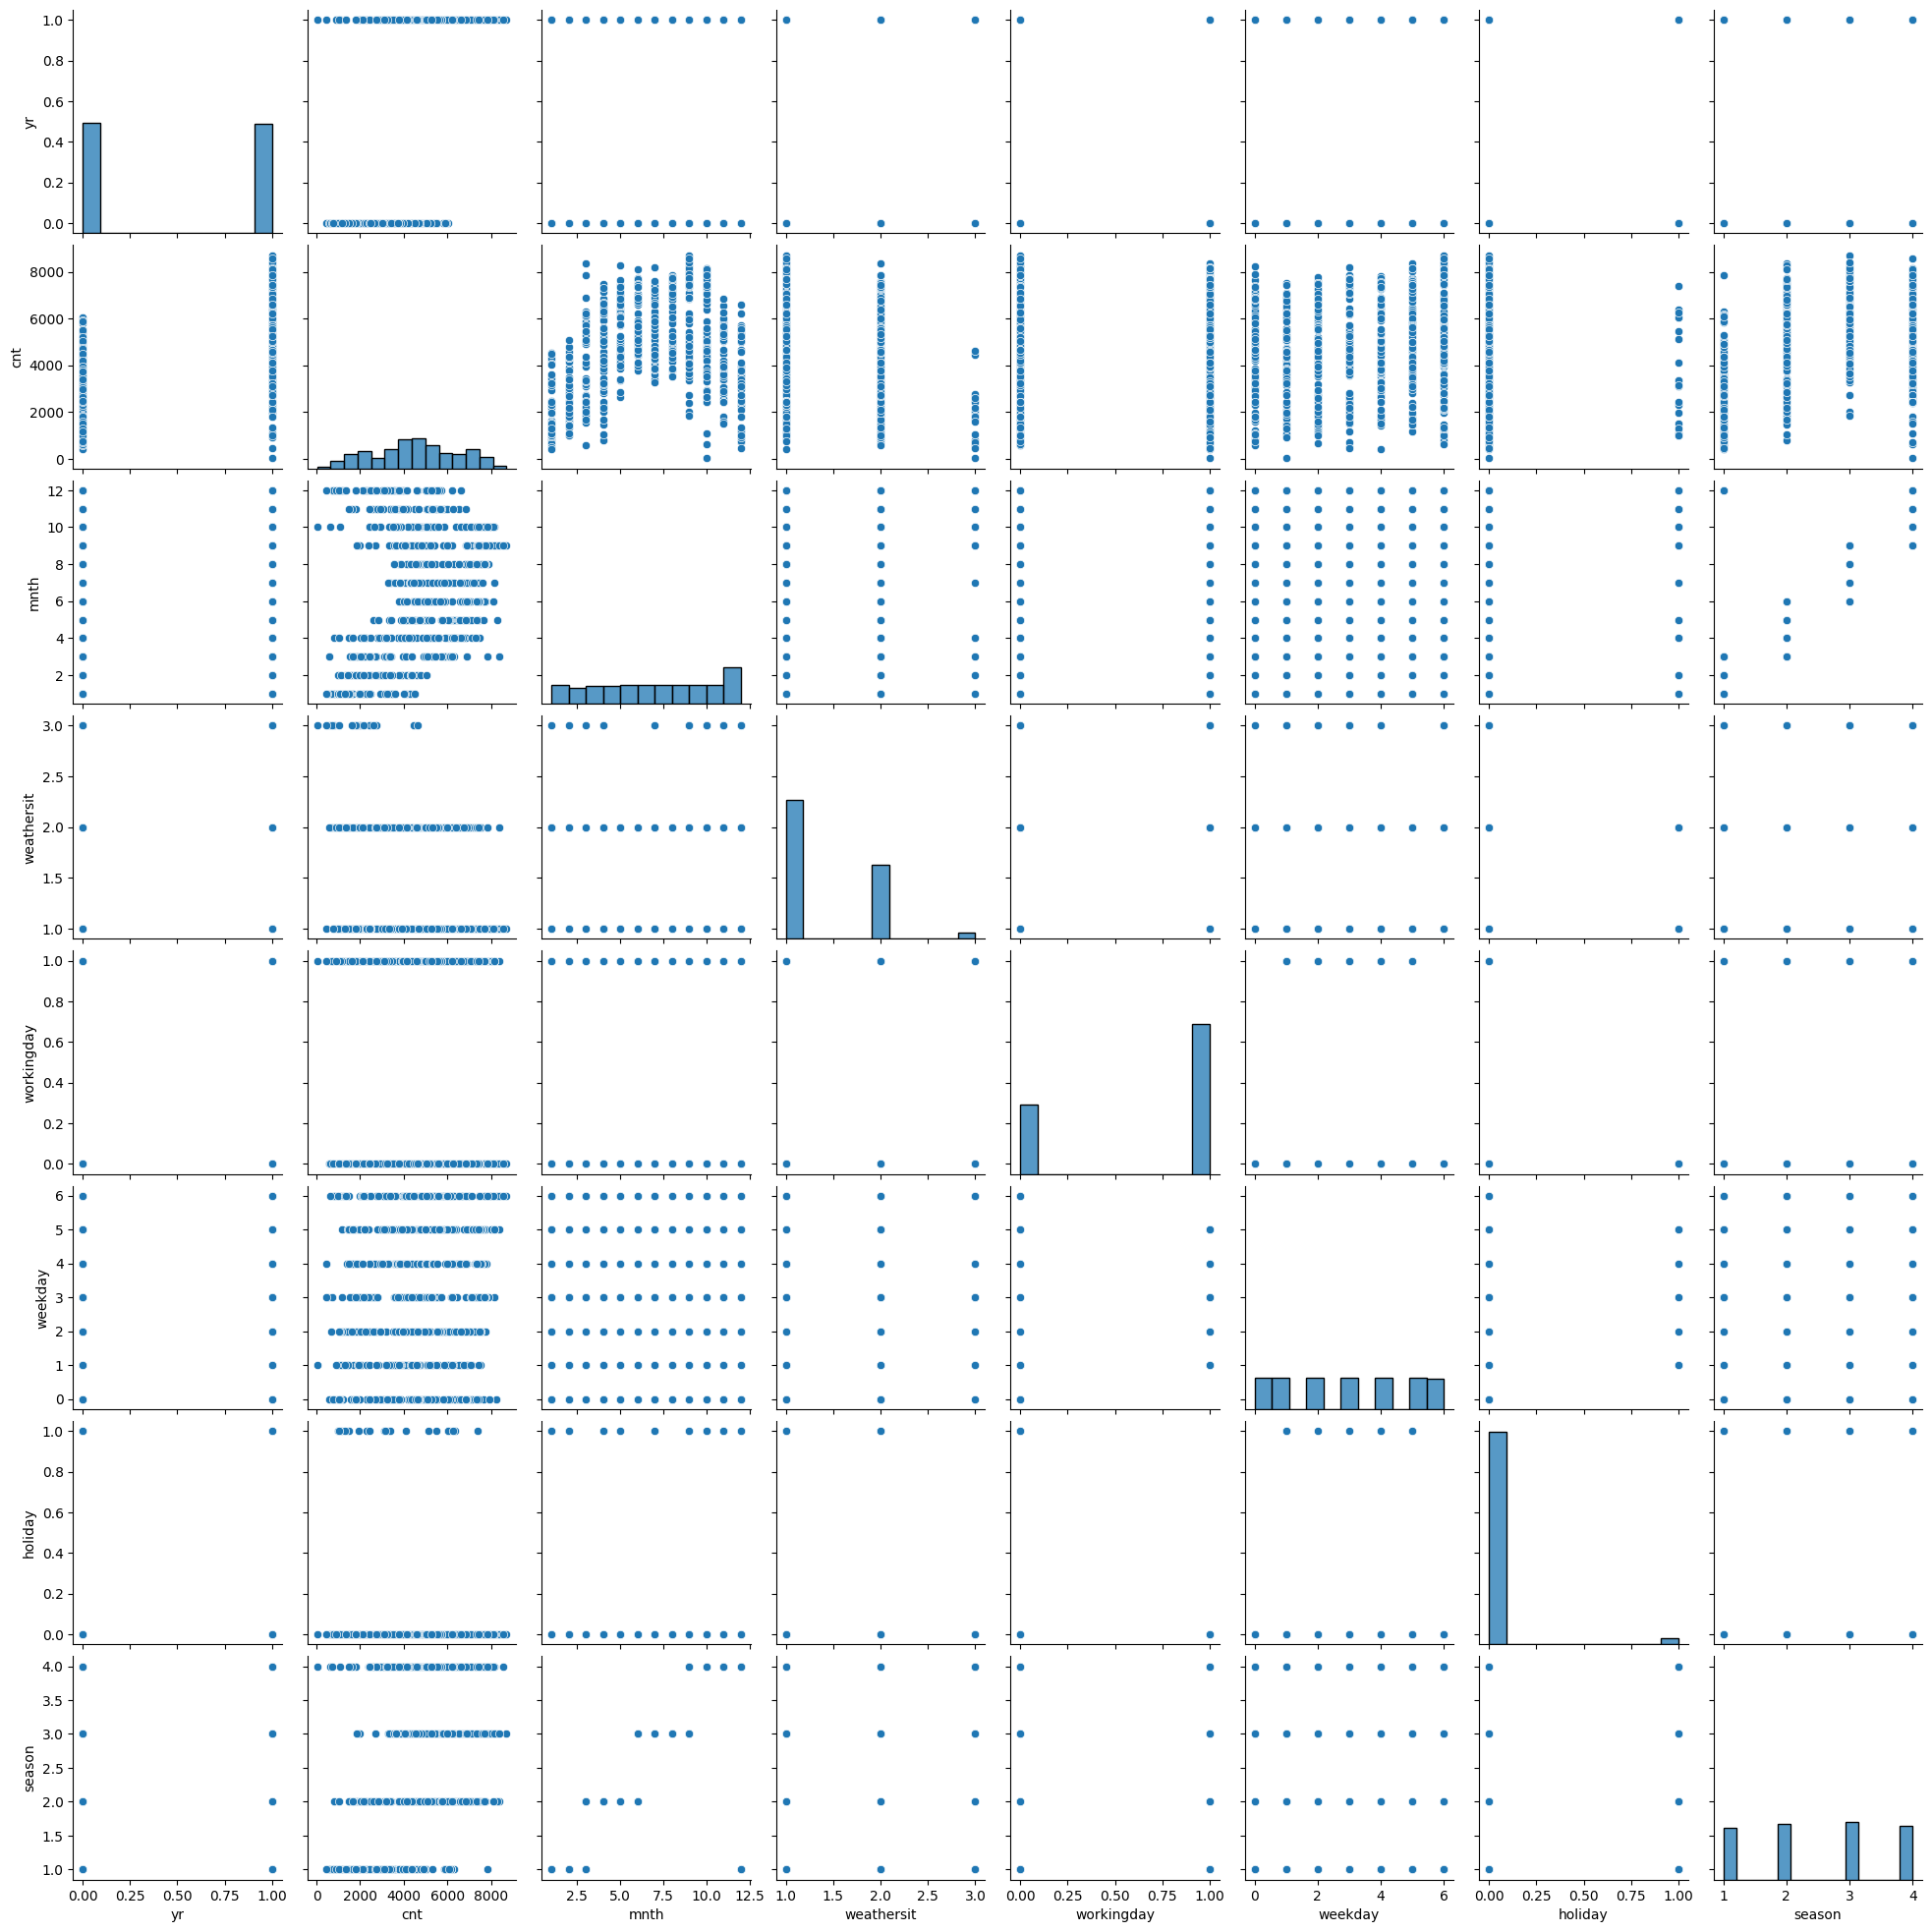

In [12]:
sns.pairplot(df_sig[list(set(df_sig.columns) - set(continuous_variables))])
plt.show()

we can see that
* the months after September have higher rent counts than the others
* Wednesday, Friday, and Saturday have higher rent counts than the other days
* Fall season has higher rent counts

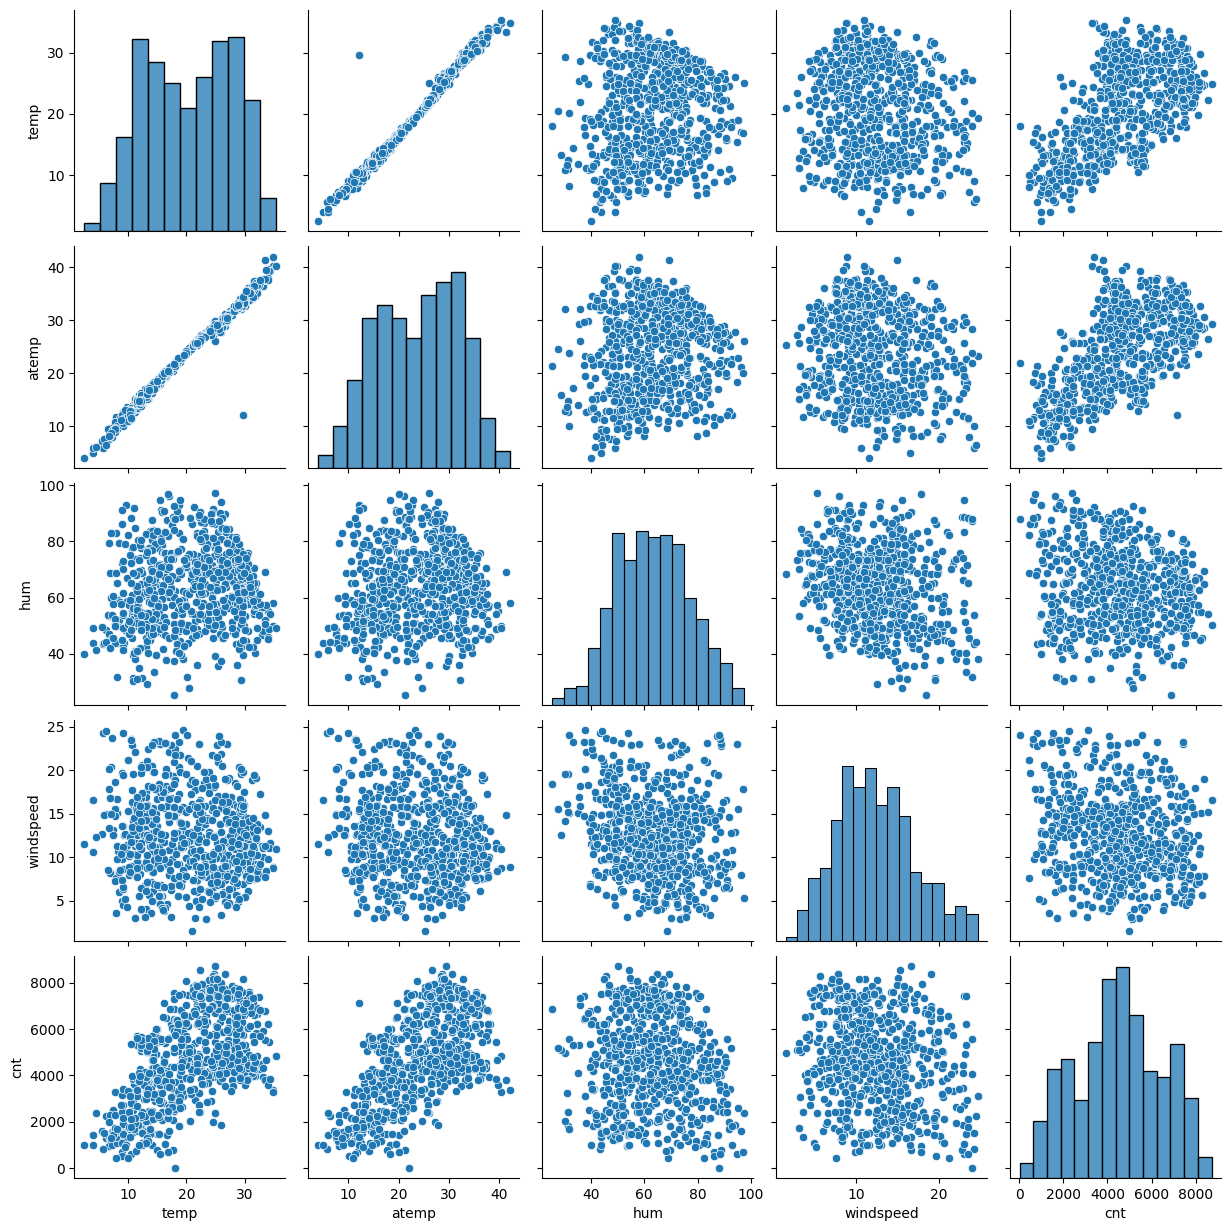

In [13]:
sns.pairplot(pd.concat([df_continuous, df['cnt']], axis=1))
plt.show()

we can see that `temp` and `atemp` have a linear relation with `cnt` with some spread, but the others have not much pattern we can deduce just by looking

we can also see that `temp` and `atemp` are almost perfectly linear with each other

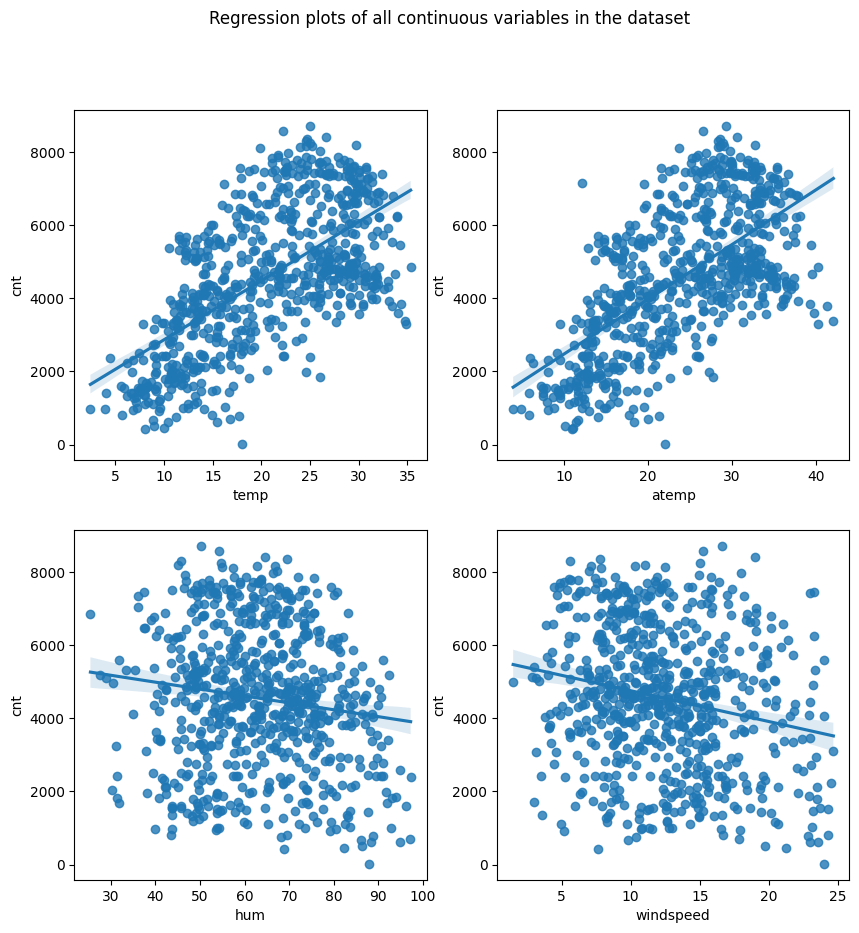

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

sns.regplot(df_sig, x='temp', y='cnt', ax = ax[0][0])
sns.regplot(df_sig, x='atemp', y='cnt', ax = ax[0][1])
sns.regplot(df_sig, x='hum', y='cnt', ax = ax[1][0])
sns.regplot(df_sig, x='windspeed', y='cnt', ax = ax[1][1])

plt.suptitle('Regression plots of all continuous variables in the dataset')
plt.show()

in the above regplots we can see that `atemp` and `temp` have a low spread of the regression line

while `hum` and `windspeed` have a high spread

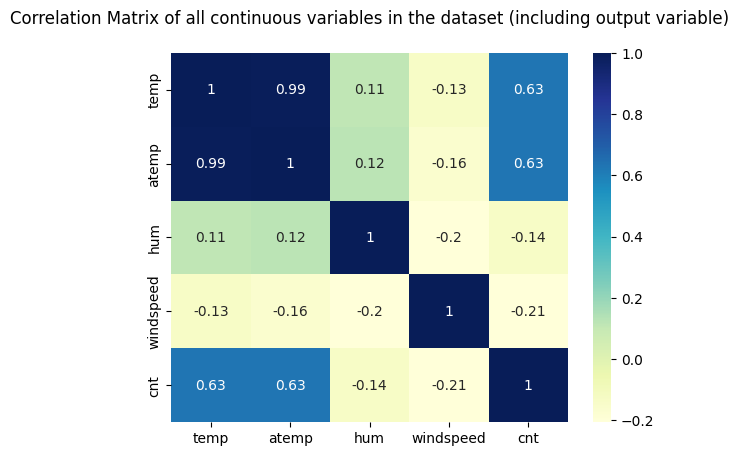

In [15]:
sns.heatmap(pd.concat([df_continuous, df['cnt']], axis=1).corr(), annot = True, cmap="YlGnBu")

plt.title("Correlation Matrix of all continuous variables in the dataset (including output variable)\n")
plt.show()

we can see that `temp` and `atemp` are highly correlated, which makes sense since the formula for `atemp` is:

$$ T_a = 35.74 + 0.6215T - 35.75V^{+0.16} + 0.4275TV^{+0.16}$$

$$ where $$
$$ T_a = Apparent Temperature $$
$$ T = Temperature $$
$$ V = Wind Speed $$

we can also see that `windspeed` is negatively correlated with `atemp` which matches the negative coefficient in the formula

we can also see that `temp` and `atemp` are highly correlated with `cnt` while `hum` and `windspeed` have negative correlation

## Preparing Data

### Dummy variables from categorical variables

In [16]:
non_binary_categorical_vars = ["season", "yr", "mnth", "weekday", "weathersit"]

For the categorical variables, we have
* `season`
    * 1: spring
    * 2: summer
    * 3: fall
    * 4: winter
* `year`
    * 0: 2018
    * 1: 2019
* `weekday`
    * 0: Sat
    * 1: Sun
    * 2: Mon
    * 3: Tue
    * 4: Wed
    * 5: Thu
    * 6: Fri
* `mnth`
    * 1: Jan
    * 2: Feb
    * 3: Mar
    * 4: Apr
    * 5: May
    * 6: Jun
    * 7: Jul
    * 8: Aug
    * 9: Sep
    * 10: Oct
    * 11: Nov
    * 12: Dec
* `weathersit`
    * 1: clear
    * 2: misty
    * 3: snowy
    * 4: rainy

We will now make dummy variables for these

In [17]:
season_map = { 1: "spring", 2: "summmer", 3: "fall", 4: "winter" }
yr_map = { 0: "2018", 1: "2019" }
weekday_map = { 0: "Sat", 1: "Sun", 2: "Mon", 3: "Tue", 4: "Wed", 5: "Thu", 6: "Fri" }
mnth_map = { 1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec" }
weathersit_map = { 1: "clear", 2: "misty", 3: "snowy", 4: "rainy" }

df_sig['season'] = df_sig['season'].map(lambda x: season_map[x])
df_sig['yr'] = df_sig['yr'].map(lambda x: yr_map[x])
df_sig['weekday'] = df_sig['weekday'].map(lambda x: weekday_map[x])
df_sig['mnth'] = df_sig['mnth'].map(lambda x: mnth_map[x])
df_sig['weathersit'] = df_sig['weathersit'].map(lambda x: weathersit_map[x])

In [18]:
df_sig.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,0,Fri,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Sat,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Sun,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Mon,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Tue,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
df_with_dummies = pd.get_dummies(df_sig, columns = non_binary_categorical_vars, drop_first = True, dtype = np.int64)
df_with_dummies.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summmer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_misty,weathersit_snowy
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [20]:
df_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 729
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   holiday           712 non-null    int64  
 1   workingday        712 non-null    int64  
 2   temp              712 non-null    float64
 3   atemp             712 non-null    float64
 4   hum               712 non-null    float64
 5   windspeed         712 non-null    float64
 6   cnt               712 non-null    int64  
 7   season_spring     712 non-null    int64  
 8   season_summmer    712 non-null    int64  
 9   season_winter     712 non-null    int64  
 10  yr_2019           712 non-null    int64  
 11  mnth_Aug          712 non-null    int64  
 12  mnth_Dec          712 non-null    int64  
 13  mnth_Feb          712 non-null    int64  
 14  mnth_Jan          712 non-null    int64  
 15  mnth_Jul          712 non-null    int64  
 16  mnth_Jun          712 non-null    int64  
 17  mn

## Building the Model

### Splitting into training and test data

In [21]:
df_train, df_test = train_test_split(df_with_dummies, train_size = 0.7, random_state = 100)

In [22]:
print(df_train.shape)
print(df_test.shape)

(498, 30)
(214, 30)


### Minmax Scaling

In [23]:
scaler = MinMaxScaler()
df_train[continuous_variables] = scaler.fit_transform(df_train[continuous_variables])

In [24]:
df_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summmer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_misty,weathersit_snowy
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,...,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,0.030120,0.696787,0.541922,0.528235,0.499220,0.468410,4550.975904,0.238956,0.238956,0.251004,...,0.082329,0.078313,0.136546,0.146586,0.134538,0.152610,0.158635,0.144578,0.367470,0.028112
std,0.171091,0.460109,0.229850,0.218858,0.205010,0.209357,1945.505249,0.426875,0.426875,0.434027,...,0.275142,0.268934,0.343713,0.354049,0.341573,0.359973,0.365702,0.352029,0.482601,0.165460
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.343228,0.345674,0.345921,0.314743,3217.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.537923,0.540014,0.500556,0.440645,4605.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.745338,0.711962,0.647083,0.606998,6083.000000,0.000000,0.000000,0.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Training Model using RFE and manual elimination

In [25]:
y_train = df_train.pop('cnt')
X_train = df_train

In [26]:
# helper methods

def fit_linear_model(X_train, y_train):
    return LinearRegression().fit(X_train, y_train)

def calculate_r_squared(y_train, y_pred):
    r_squared = r2_score(y_true=y_train, y_pred=y_pred)
    print("R-squared: ", r_squared)

def calculate_sse(X_train, y_train, y_pred):
    sse = np.sum((y_pred - y_train) ** 2, axis=0) / float(X_train.shape[0] - X_train.shape[1])
    return sse

def calculate_standard_error(sse, X_train):
    XtX_inv = np.linalg.inv(np.dot(X_train.T, X_train))
    return np.sqrt(np.diagonal(sse * XtX_inv))

def calculate_t_values(model, se):
    return model.coef_ / se

def calculate_p_values(t_values, X_train, y_train):
    return np.squeeze(2 * (1 - stats.t.cdf(np.abs(t_values), y_train.shape[0] - X_train.shape[1])))

def calculate_vifs(X_train):
    return [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

def print_stats(X_train, model, std_error, t_value, p_value, vif):
    print("Stats: \n")
    stats_df = pd.DataFrame({
        'Features': X_train.columns,
        'Coeff': model.coef_,
        'StdErr': np.round(std_error, 4),
        'T-Value': np.round(t_value, 4),
        'P-Value': np.round(p_value, 4),
        'VIF': np.round(vif, 4)
    })

    print(stats_df)
    return stats_df

In [27]:
def fit_model_and_calculate_stats(X_train, y_train, show_stats = True):
    model = fit_linear_model(X_train, y_train)
    if(not show_stats):
        return model

    print("============================== Model Stats =================================")
    y_pred = model.predict(X_train)
    calculate_r_squared(y_train, y_pred)

    sse = calculate_sse(X_train, y_train, y_pred)
    se = calculate_standard_error(sse, X_train)
    t = calculate_t_values(model, se)
    p = calculate_p_values(t, X_train, y_train)
    vif = calculate_vifs(X_train)

    print_stats(X_train, model, se, t, p, vif)

    print("\nIntercept:", model.intercept_)

    return model


In [28]:
def generate_new_dataset_with_rfe(model, X_train, y_train, feature_count = 10):
    rfe = RFE(model, n_features_to_select=feature_count).fit(X_train, y_train)

    print("============================== RFE =================================")

    ranking_list = pd.DataFrame({
        'Columns': X_train.columns,
        'Support': rfe.support_,
        'Ranking': rfe.ranking_
    })
    print("Ranking List:")
    print(ranking_list.sort_values(by='Ranking'))

    selected_columns = X_train.columns[rfe.support_]

    print("Selected Columns:")
    print(selected_columns)
    return X_train[selected_columns]
    

In [29]:
initial_model = fit_model_and_calculate_stats(X_train, y_train, show_stats=False)

now we will start eliminiating features with RFE and manually

the variables below will be named with the following scheme

* `X_train_n`: training dataset with `n` features
* `model_n`: model trained with `n` features

In [30]:
X_train_12 = generate_new_dataset_with_rfe(initial_model, X_train, y_train, feature_count=12)
model_12 = fit_model_and_calculate_stats(X_train_12, y_train)

============================== RFE =================================
Ranking List:
             Columns  Support  Ranking
0            holiday     True        1
22       weekday_Sat     True        1
20          mnth_Sep     True        1
17          mnth_May     True        1
11          mnth_Dec     True        1
9            yr_2019     True        1
8      season_winter     True        1
28  weathersit_snowy     True        1
6      season_spring     True        1
5          windspeed     True        1
3              atemp     True        1
4                hum     True        1
18          mnth_Nov    False        2
13          mnth_Jan    False        3
12          mnth_Feb    False        4
27  weathersit_misty    False        5
10          mnth_Aug    False        6
15          mnth_Jun    False        7
23       weekday_Sun    False        8
21       weekday_Mon    False        9
2               temp    False       10
7     season_summmer    False       11
19          mnth_Oct

we can remove `atemp` due to its high `VIF`

In [31]:
X_train_11 = X_train_12.drop('atemp', axis = 1)
model_11 = fit_model_and_calculate_stats(X_train_11, y_train)

============================== Model Stats =================================
R-squared:  0.7713567974702538
Stats: 

            Features        Coeff    StdErr  T-Value  P-Value     VIF
0            holiday  -635.872742  247.5460  -2.5687   0.0105  1.0408
1                hum -1189.112843  165.1050  -7.2022   0.0000  4.4755
2          windspeed -1261.900000  158.6089  -7.9560   0.0000  3.7328
3      season_spring -2464.983778  110.9085 -22.2254   0.0000  1.6574
4      season_winter  -367.498802  111.8550  -3.2855   0.0011  1.7708
5            yr_2019  2111.309039   80.0199  26.3848   0.0000  1.8198
6           mnth_Dec  -588.037280  158.9575  -3.6993   0.0002  1.2588
7           mnth_May   275.488399  154.7108   1.7807   0.0756  1.3009
8           mnth_Sep   672.572173  165.0259   4.0756   0.0001  1.2026
9        weekday_Sat  -466.395498  119.2211  -3.9120   0.0001  1.1748
10  weathersit_snowy -1917.071273  265.9494  -7.2084   0.0000  1.1212

Intercept: 5466.967312325391


now since all the `VIF` are below 5, we can start removing based on `P-Value`

we can remove `mnth_May` as it has the highest `P-Value`

In [32]:
X_train_10 = X_train_11.drop('mnth_May', axis = 1)
model_10 = fit_model_and_calculate_stats(X_train_10, y_train)

============================== Model Stats =================================
R-squared:  0.7698746445370365
Stats: 

           Features        Coeff    StdErr  T-Value  P-Value     VIF
0           holiday  -620.446582  247.9204  -2.5026   0.0127  1.0393
1               hum -1119.515270  157.7144  -7.0984   0.0000  4.0658
2         windspeed -1257.841283  158.5177  -7.9350   0.0000  3.7121
3     season_spring -2519.670943  107.1985 -23.5047   0.0000  1.5416
4     season_winter  -423.382109  108.0288  -3.9192   0.0001  1.6445
5           yr_2019  2112.515851   80.1546  26.3555   0.0000  1.8179
6          mnth_Dec  -591.913305  159.2952  -3.7158   0.0002  1.2586
7          mnth_Sep   618.061512  162.5965   3.8012   0.0002  1.1623
8       weekday_Sat  -466.518678  119.4830  -3.9045   0.0001  1.1748
9  weathersit_snowy -1958.408870  264.9805  -7.3908   0.0000  1.1081

Intercept: 5488.688174663431


we can remove `holiday` as it has the highest `P-Value`

In [33]:
X_train_9 = X_train_10.drop('holiday', axis = 1)
model_9 = fit_model_and_calculate_stats(X_train_9, y_train)

============================== Model Stats =================================
R-squared:  0.7669245673758629
Stats: 

           Features        Coeff    StdErr  T-Value  P-Value     VIF
0               hum -1119.533646  158.4606  -7.0651   0.0000  4.0607
1         windspeed -1267.857242  159.1165  -7.9681   0.0000  3.7005
2     season_spring -2525.568540  107.7288 -23.4438   0.0000  1.5403
3     season_winter  -429.645100  108.5579  -3.9578   0.0001  1.6429
4           yr_2019  2115.477739   80.5839  26.2519   0.0000  1.8179
5          mnth_Dec  -587.064828  160.1380  -3.6660   0.0003  1.2584
6          mnth_Sep   601.868358  163.3296   3.6850   0.0003  1.1603
7       weekday_Sat  -444.303349  119.8147  -3.7083   0.0002  1.1688
8  weathersit_snowy -1933.435133  266.0899  -7.2661   0.0000  1.1055

Intercept: 5473.070456588101


Now in the current model `model_9`

* we can see that all the `P-Value` are below 0.005, which means that they have a good significance to the output
* we can see that all the `VIF` are below 5 which means that the variance is within 80%

In [34]:
final_model = model_9
final_X_train = X_train_9

## Residual Analysis

In [35]:
y_train_pred = final_model.predict(final_X_train)

In [36]:
res = y_train - y_train_pred

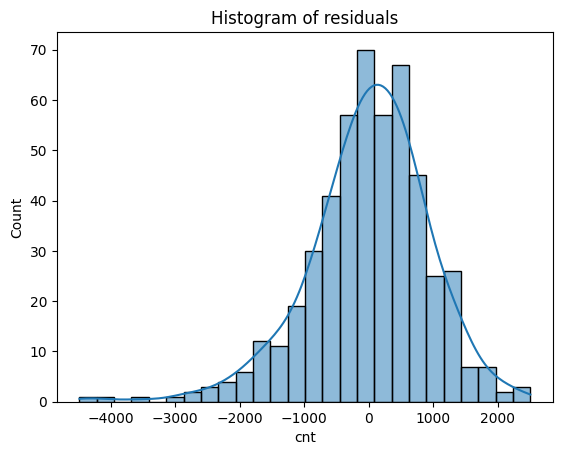

In [37]:
sns.histplot(res, kde=True)

plt.title('Histogram of residuals')
plt.show()

we see that the residual errors follow a normal distribution very closely, so we can say that the model we have arrived at matches the data with a reasonable degree of accuracy

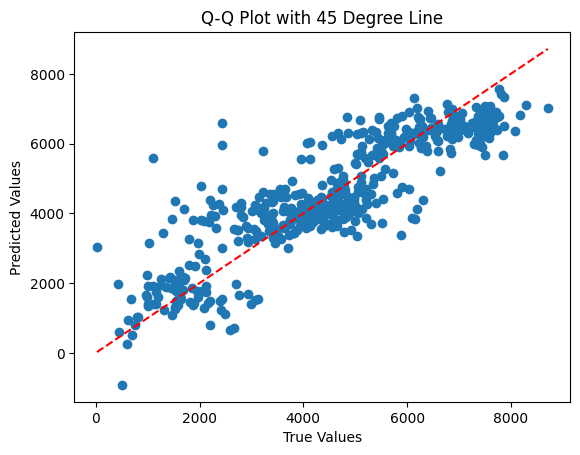

In [38]:
# Q-Q plot
plt.scatter(y_train, y_train_pred)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Q-Q Plot with 45 Degree Line')
plt.show()

## Evaluating the model on the test set

### Transforming the test data to match with the training_data

In [39]:
df_test[continuous_variables] = scaler.transform(df_test[continuous_variables])

In [40]:
df_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summmer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_misty,weathersit_snowy
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,...,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,0.028037,0.658879,0.559091,0.542795,0.478490,0.476811,4540.186916,0.233645,0.289720,0.233645,...,0.088785,0.098131,0.163551,0.140187,0.163551,0.116822,0.107477,0.135514,0.271028,0.028037
std,0.165467,0.475198,0.226149,0.216420,0.214382,0.191997,1899.951525,0.424141,0.454696,0.424141,...,0.285100,0.298189,0.370735,0.347995,0.370735,0.321962,0.310444,0.343074,0.445533,0.165467
min,0.000000,0.000000,0.046591,0.026455,-0.071841,0.057588,795.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.360271,0.357544,0.307784,0.333635,3271.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.578939,0.573831,0.476550,0.470283,4467.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.743261,0.713014,0.637107,0.586318,5868.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,0.984424,1.019437,1.003117,0.992781,8555.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
df_test = df_test[list(final_X_train.columns) + ['cnt']]

In [42]:
df_test.head()

,hum,windspeed,season_spring,season_winter,yr_2019,mnth_Dec,mnth_Sep,weekday_Sat,weathersit_snowy,cnt
585,0.476238,0.386691,0,0,1,0,0,0,0,7286
717,0.483721,0.467646,0,1,1,1,0,0,0,5267
294,0.489332,0.203239,0,1,0,0,0,0,0,4308
157,0.442568,0.478392,0,0,0,0,0,0,0,4833
627,0.473120,0.276987,0,0,1,0,1,0,0,7720


In [43]:
y_test = df_test.pop('cnt')
X_test = df_test

In [44]:
y_pred = final_model.predict(X_test)

### R-squared Metric for Test Data

In [45]:
r2_score(y_true = y_test, y_pred=y_pred)

0.7070257106770005

now we can see that the r squared metric for the training data is `0.76692` and for the testing data is `0.70703`

this means that the model explains around `70.7%` of the variance in the dataset

since the r-squared metrics for the test and training data are close together (within 10%) this means that the model has generalized farily well and is not overfitting

## Final Equation


In [46]:
# coefficients
pd.DataFrame({
    'Columns': final_X_train.columns,
    'Coefficients': final_model.coef_
})

,Columns,Coefficients
0,hum,-1119.533646
1,windspeed,-1267.857242
2,season_spring,-2525.568540
3,season_winter,-429.645100
4,yr_2019,2115.477739
5,mnth_Dec,-587.064828
6,mnth_Sep,601.868358
7,weekday_Sat,-444.303349
8,weathersit_snowy,-1933.435133


In [47]:
# intercept
pd.DataFrame({"Intercept": [final_model.intercept_]})

,Intercept
0,5473.070457


therfore final equation we get from the model is as follows:

$$
\begin{flalign*}
cnt & = 5473.0705 + (-1119.5336) \times hum + (-1267.8572) \times windspeed + (-2525.5685) \times season\_spring + \\
    & (-429.6451) \times season\_winter + 2115.4777 \times yr\_2019 + (-587.0648) \times mnth\_Dec + \\
    & 601.8683 \times mnth\_Sep +(-444.3033) \times weekday\_Sat + (-1933.4351) \times weathersit\_snowy
\end{flalign*}
$$

## Conclusion

we can see that the following variables are required for the model
* `hum`
* `windspeed`
* `season_spring`
* `season_winter`
* `yr_2019`
* `mnth_Dec`
* `mth_Sep`
* `weekday_Sat`
* `weathersit_snowy`
